In [ ]:
#Project Description:
#The dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family.
#it having the class with valur p = poisionous and e = edible.

In [1]:
#Imoporting neccecory Libraries:

#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprecessing Lib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#outliars
from scipy import stats

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif

#model lib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

#Model Evaluation
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,plot_roc_curve,confusion_matrix
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset:
df=pd.read_csv('mushrooms_CSV.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
pd.set_option('display.max_rows',None)

In [3]:
df.shape

(8124, 23)

In [ ]:
#there is 8124 rows and 23 columns is availble in the data

In [5]:
df.info()
#here we can see that we have total 22 features and 1 label with all having no null value and object datatype. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()
#here we have cross checked the null value in every colums and find there is no null value in the columns

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

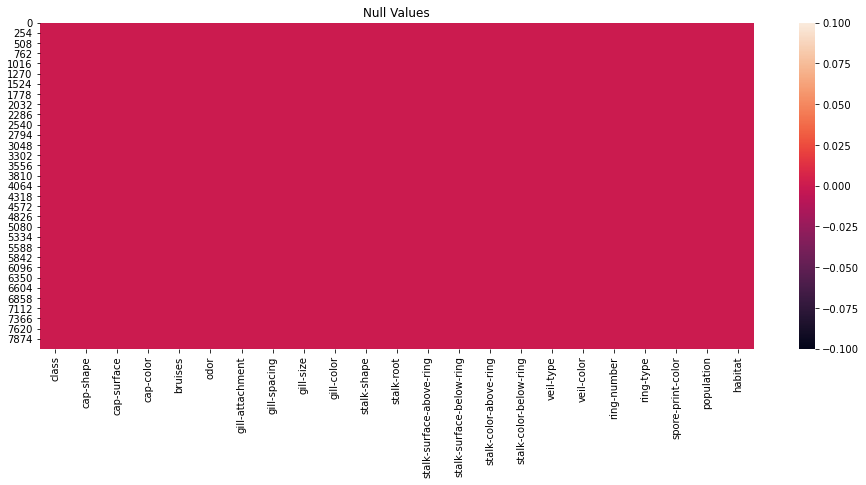

In [7]:
#checking the null value using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [8]:
df['class'].value_counts()
#here we are checking the total value count of label and get that we have e count 4208 and p count 3916.

e    4208
p    3916
Name: class, dtype: int64

In [9]:
#replace the labels column(class) into binary number
#Machine learing model does not understand the char we have to convert it to binary code.
df['class']=df['class'].replace({'e':1,'p':0})

In [10]:
df['class'].value_counts()

1    4208
0    3916
Name: class, dtype: int64

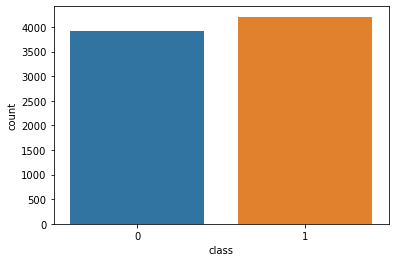

In [11]:
#Plotting the count plot to check label data
sns.countplot(x='class',data=df)
plt.show()

In [ ]:
#here label data count looks balanced no need to perform over or under sampling.

In [12]:
ohe=OneHotEncoder()

In [13]:
#As in the dataset all the features are in catagorical formet so we are using the onehot encoder to convert the catogorical
#data into the numeric(binary) data so machine understand the features
df1=pd.DataFrame(ohe.fit_transform(df.iloc[:,1:]).toarray())

In [14]:
#murzing the df1 dataframe to df(original) Dataframe.
df=df.join(df1)

In [15]:
df.head()
#here we can see that the df1 Dataframe has merged to df.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,107,108,109,110,111,112,113,114,115,116
0,0,x,s,n,t,p,f,c,n,k,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,x,s,y,t,a,f,c,b,k,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,b,s,w,t,l,f,c,b,n,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,x,y,w,t,p,f,c,n,n,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,x,s,g,f,n,f,w,b,k,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#After the Conveting the Catagorical Data into Numerical we can drop the catagerrical features form the dataset.
df=df.drop(columns=df.columns[1:23])

In [17]:
df.shape
#the new shape of dataframe is 8124 rows and 118 columns.

(8124, 118)

In [18]:
df.head()

,class,0,1,2,3,4,5,6,7,8,...,107,108,109,110,111,112,113,114,115,116
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df.describe()

,class,0,1,2,3,4,5,6,7,8,...,107,108,109,110,111,112,113,114,115,116
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


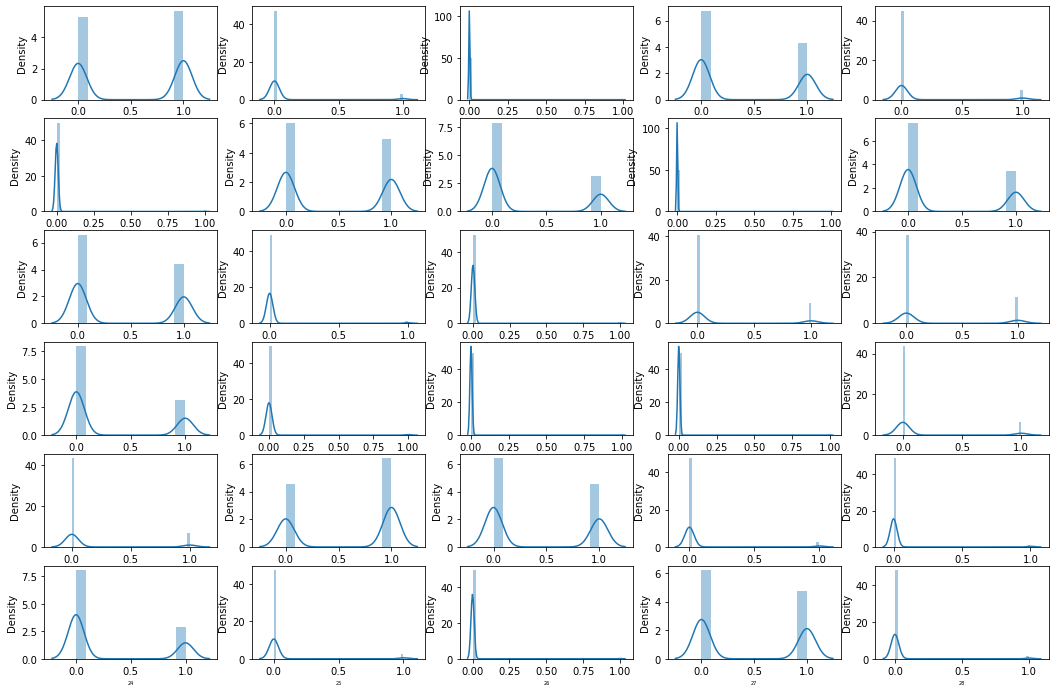

In [51]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for column in df.columns[:31]:
    if pltnum <= 30:
        plt.subplot(6,5,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=5)
        
    pltnum +=1
plt.show()    

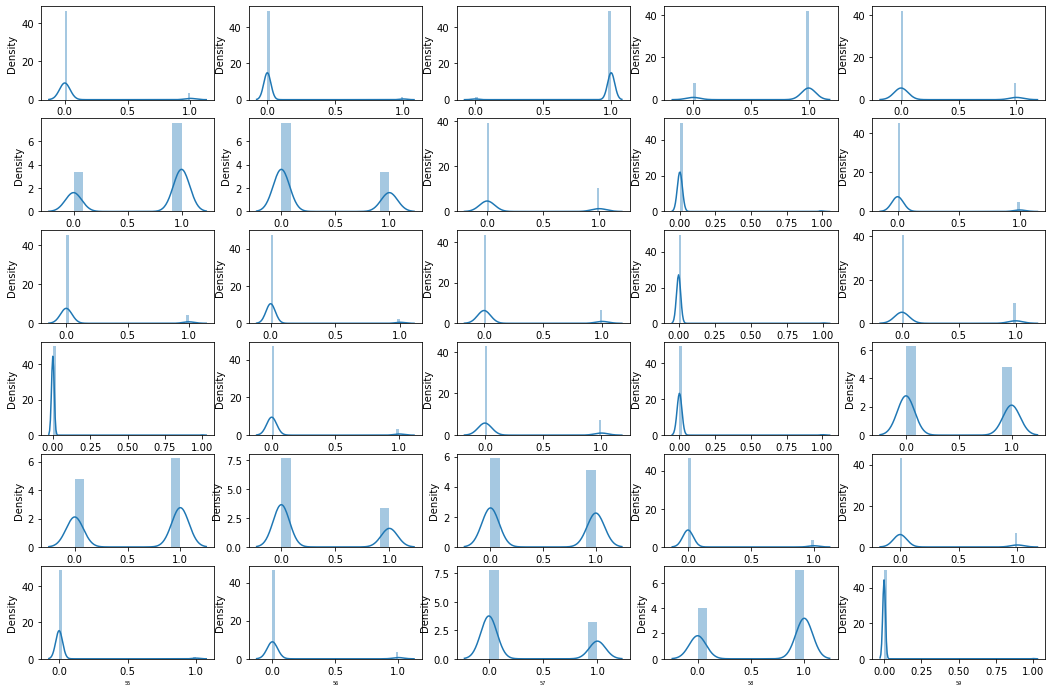

In [52]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for column in df.columns[31:61]:
    if pltnum <= 30:
        plt.subplot(6,5,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=5)
        
    pltnum +=1
plt.show()    

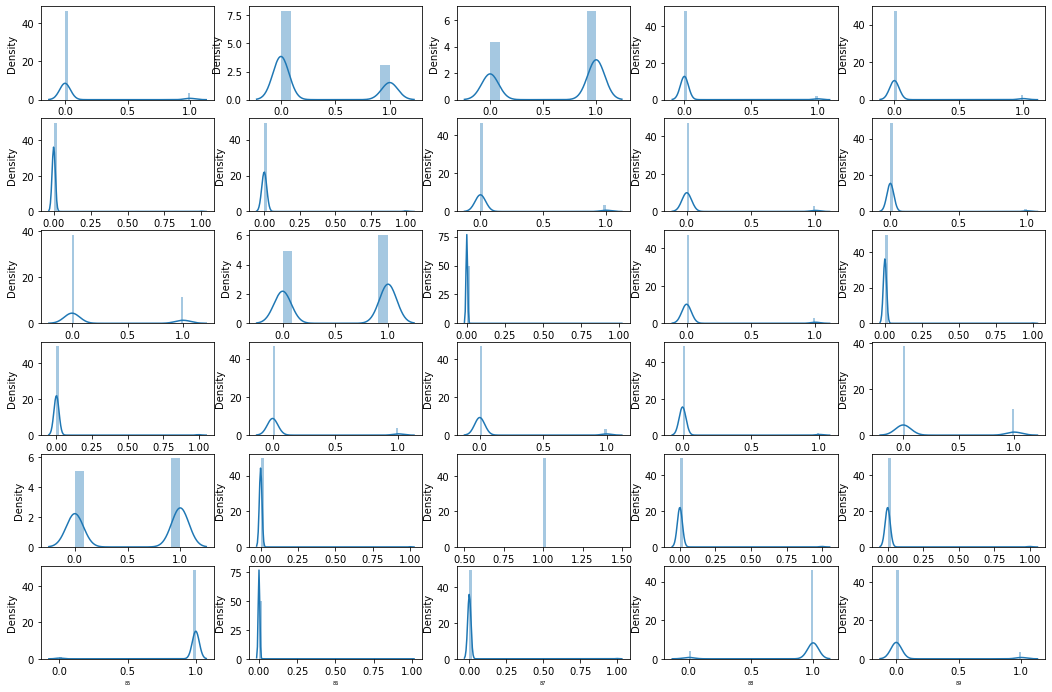

In [53]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for column in df.columns[61:91]:
    if pltnum <= 30:
        plt.subplot(6,5,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=5)
        
    pltnum +=1
plt.show()    

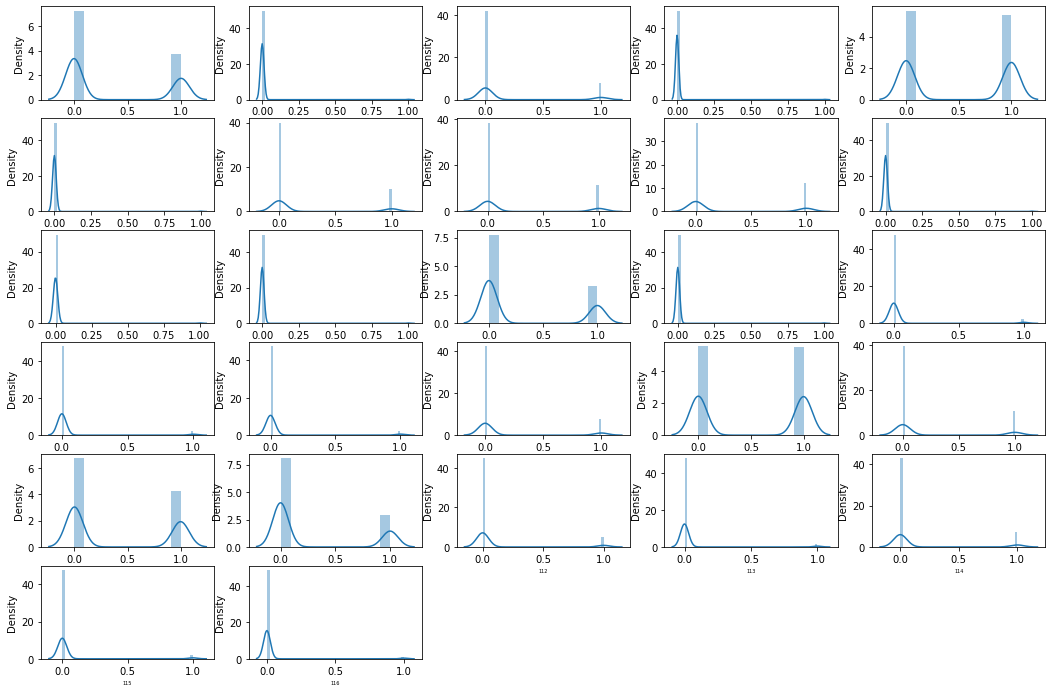

In [54]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for column in df.columns[91:]:
    if pltnum <= 30:
        plt.subplot(6,5,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=5)
        
    pltnum +=1
plt.show()    

In [ ]:
#as we can see data distribution looks normal for all the features.

In [ ]:
#Outliars and skewness Details:
#As all the features under goes onehot Encoder so there is no need to perform the Outliers and skewness detection and deletion
#for the features in Dataframe.

In [20]:
#seprating lalel and features
x=df.drop(columns='class',axis=1)
y=df['class']

In [ ]:
#StandredScalar:
#As all the features under goes onehot Encoder so there is no need to perform the StandredScalar for the features in Dataframe.

In [21]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state = i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print("Best Accuracy is ",maxAcc,"on random_state",maxRs)        

Best Accuracy is  1.0 on random_state 3


In [22]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state =3)

In [23]:
#First Using the Logistic Reggression:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred=lr.predict(x_test)

In [25]:
print('\n==========Outputs of LR===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_pred)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_pred,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_pred))


==========Outputs of LR===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       837

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

=========Confusion Matrix============
[[788   0]
 [  0 837]]


In [26]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

In [97]:
print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       837

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

=========Confusion Matrix============
[[788   0]
 [  0 837]]


In [27]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=dt.predict(x_test)

In [28]:
print('\n==========Outputs of RFC===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of RFC===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       837

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

=========Confusion Matrix============
[[788   0]
 [  0 837]]


In [29]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_predabc=dt.predict(x_test)

In [30]:
print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       837

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

=========Confusion Matrix============
[[788   0]
 [  0 837]]


In [31]:
from sklearn.svm import SVC

In [32]:
svc=SVC()
svc.fit(x_train,y_train)
y_predsvc=svc.predict(x_test)

In [33]:
print('\n==========Outputs of SVC===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predsvc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predsvc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predsvc))


==========Outputs of SVC===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       837

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

=========Confusion Matrix============
[[788   0]
 [  0 837]]


In [34]:
#Now checking the Overfitting of the all the models.

In [35]:
from sklearn.model_selection import cross_val_score

In [41]:
cvs=cross_val_score(lr,x,y,cv=5)
print("Cross validation for the Logistics Model is: ",cvs.mean()*100)

Cross validation for the Logistics Model is:  91.93427813565745


In [42]:
cvs=cross_val_score(dt,x,y,cv=5)
print("Cross validation for the Decision Tree is: ",cvs.mean()*100)

Cross validation for the Decision Tree is:  99.6182796513831


In [43]:
cvs=cross_val_score(rfc,x,y,cv=5)
print("Cross validation for the Random Forest Classifier is: ",cvs.mean()*100)

Cross validation for the Random Forest Classifier is:  91.45514209928002


In [44]:
cvs=cross_val_score(abc,x,y,cv=5)
print("Cross validation for the AdaBoost Classifier is: ",cvs.mean()*100)

Cross validation for the AdaBoost Classifier is:  92.88359226979918


In [45]:
cvs=cross_val_score(svc,x,y,cv=5)
print("Cross validation for the SVC Classifier is: ",cvs.mean()*100)

Cross validation for the SVC Classifier is:  87.57588480485033


In [ ]:
#Here Decision Tree has the least diffirence i.e. 0.39 so Decision Tree is the best model here.

In [ ]:
#Now we will do Hyper Parameter Tuning on Decison Tree:

In [46]:
#selecting all the parameter in the directory to pass it to GridSearchCV
grid_param={'criterion':['gini','entropy'],
           'max_depth':range(2,20,2),
           'min_samples_leaf': range(2,30,2),
           'min_samples_split':range(2,30,2)}

In [47]:
grid_srh=GridSearchCV(dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [48]:
grid_srh.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(2, 30, 2),
                         'min_samples_split': range(2, 30, 2)})

In [116]:
grid_srh.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [49]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=2,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

In [50]:
y_preddtc=dtc.predict(x_test)

In [51]:
print('\n==========Outputs of DT after Hyper Parameter Tuning===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddtc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddtc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddtc))


==========Outputs of DT after Hyper Parameter Tuning===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       837

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

=========Confusion Matrix============
[[788   0]
 [  0 837]]


In [53]:
cvs=cross_val_score(dtc,x,y,cv=5)
print("Cross validation after Hyper Parameter Tuning for the Decision Tree is: ",cvs.mean()*100)

Cross validation after Hyper Parameter Tuning for the Decision Tree is:  95.67739295187572


In [54]:
#Saving the Model in pkl file:

In [55]:
import joblib
joblib.dump(dtc,'Mushroom.pkl')

['Mushroom.pkl']

In [ ]:
#This Compelete the our model building on Mushroom Dataset.